# EDA of IMU data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
data = pd.read_csv("IMU_data.csv")

In [3]:
data.head()

,AccX,AccY,AccZ,Tmp,GyroX,GyroY,GyroZ
0,-7176,6532,12192,32.77,-474,-58,22
1,-7180,6424,12308,32.72,-452,-103,44
2,-7096,6312,12172,32.72,158,-53,-75
3,-7256,6500,12108,32.67,-241,-159,21
4,-7288,6460,12368,32.67,-433,-59,15


In [4]:
del data["Tmp"]

In [5]:
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,-7176,6532,12192,-474,-58,22
1,-7180,6424,12308,-452,-103,44
2,-7096,6312,12172,158,-53,-75
3,-7256,6500,12108,-241,-159,21
4,-7288,6460,12368,-433,-59,15


In [6]:
data.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,-5383.750406,5192.027192,11340.717127,-540.316964,-156.325081,15.632305
std,4839.995999,5071.982393,5620.422172,9232.605541,8492.113905,5451.032719
min,-32768.000000,-32768.000000,-24176.000000,-32768.000000,-32768.000000,-32768.000000
25%,-7240.000000,6323.000000,12007.000000,-417.000000,-85.000000,-31.000000
50%,-7168.000000,6412.000000,12240.000000,-248.000000,-44.000000,-4.000000
75%,-7020.000000,6488.000000,12348.000000,-108.000000,-7.000000,23.000000
max,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,30229.000000


In [45]:
# getting means of all the accleration values
XMean = data["AccX"].mean()
YMean = data["AccY"].mean()
ZMean = data["AccZ"].mean()

print(XMean, YMean, ZMean)

-5383.7504058441555 5192.027191558442 11340.717126623376


# Plot accleration values

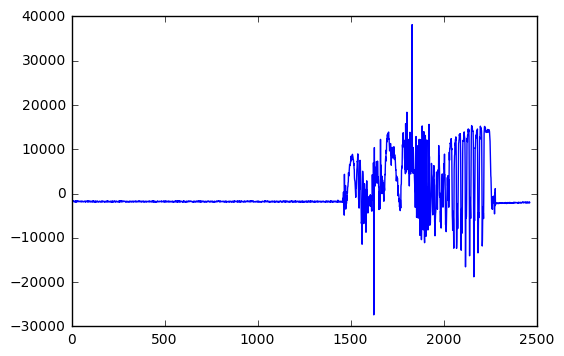

In [8]:
plot.plot( data["AccX"]-XMean)

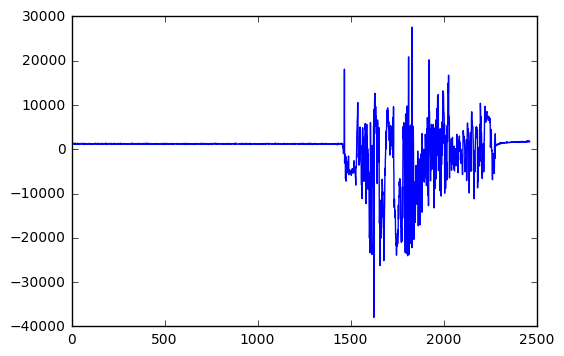

In [9]:
plot.plot( data["AccY"]-YMean)

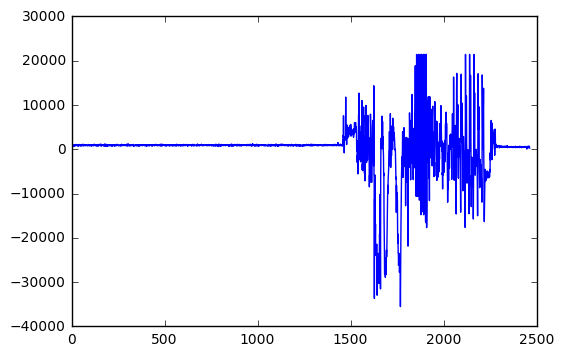

In [10]:
plot.plot( data["AccZ"]-ZMean)

# Get the offsets

In [40]:
data_offsets = pd.read_csv("IMU_calibration_offsets.csv")
data_offsets.head()

,off_AccX,off_AccY,off_AccZ,off_GyX,off_GyY,off_GyZ
0,1362,-2218,2014,61,12,2
1,1235,-2231,2009,61,12,1
2,1416,-2190,2017,61,12,2
3,1236,-2173,2019,61,14,17
4,1325,-2310,2015,61,13,7


In [41]:
data_offsets.describe()

,off_AccX,off_AccY,off_AccZ,off_GyX,off_GyY,off_GyZ
count,6.000000,6.000000,6.000000,6.0,6.000000,6.000000
mean,1312.833333,-2230.000000,2014.166667,61.0,12.666667,5.333333
std,71.087036,49.351798,3.710346,0.0,0.816497,6.088240
min,1235.000000,-2310.000000,2009.000000,61.0,12.000000,1.000000
25%,1252.750000,-2251.250000,2011.750000,61.0,12.000000,2.000000
50%,1314.000000,-2224.500000,2014.500000,61.0,12.500000,2.500000
75%,1352.750000,-2197.000000,2016.500000,61.0,13.000000,6.000000
max,1416.000000,-2173.000000,2019.000000,61.0,14.000000,17.000000


In [42]:
# delete the values taht look erraneous
data_offsets.drop( [3], axis=0, inplace=True )
# set data to df for ease
df = data_offsets
df.head()

,off_AccX,off_AccY,off_AccZ,off_GyX,off_GyY,off_GyZ
0,1362,-2218,2014,61,12,2
1,1235,-2231,2009,61,12,1
2,1416,-2190,2017,61,12,2
4,1325,-2310,2015,61,13,7
5,1303,-2258,2011,61,13,3


In [43]:
df.describe()

,off_AccX,off_AccY,off_AccZ,off_GyX,off_GyY,off_GyZ
count,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,1328.200000,-2241.400000,2013.200000,61.0,12.400000,3.000000
std,67.421807,45.495055,3.193744,0.0,0.547723,2.345208
min,1235.000000,-2310.000000,2009.000000,61.0,12.000000,1.000000
25%,1303.000000,-2258.000000,2011.000000,61.0,12.000000,2.000000
50%,1325.000000,-2231.000000,2014.000000,61.0,12.000000,2.000000
75%,1362.000000,-2218.000000,2015.000000,61.0,13.000000,3.000000
max,1416.000000,-2190.000000,2017.000000,61.0,13.000000,7.000000
